In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
import matplotlib.pyplot as plt
import numpy as np

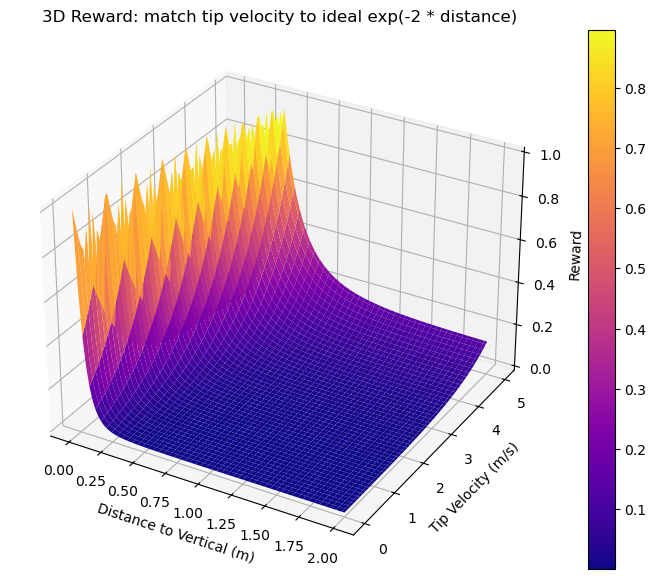

In [43]:
from mpl_toolkits.mplot3d import Axes3D

# Данные
dist = np.linspace(0, 2, 100)      # дистанция до вертикальной точки
v_tip = np.linspace(0, 5, 100)     # скорость конца маятника

Dist, V_tip = np.meshgrid(dist, v_tip)

# Идеальная скорость затухания при данной дистанции
ideal_v_tip = 7 * (1 - np.exp(- 2* x))

# Бонус за соответствие скорости идеалу: чем ближе v_tip к ideal_v_tip, тем больше бонус
F = np.exp(- np.abs(V_tip - ideal_v_tip))

# Построение графика
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Dist, V_tip, F, cmap='plasma')

# Подписи осей
ax.set_xlabel('Distance to Vertical (m)')
ax.set_ylabel('Tip Velocity (m/s)')
ax.set_zlabel('Reward')

plt.title('3D Reward: match tip velocity to ideal exp(-2 * distance)')
fig.colorbar(surf)

plt.show()


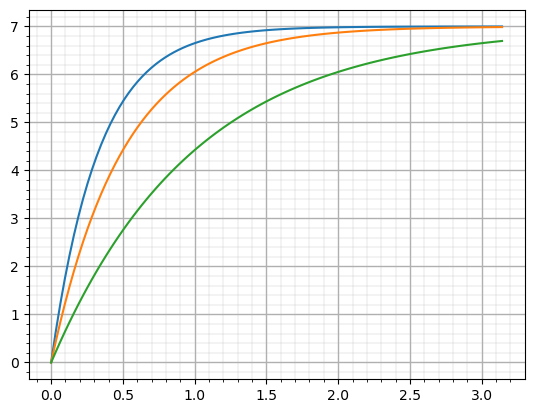

In [37]:
x = np.linspace(0, np.pi, 100)

fv_experiment_1 = 7 * (1 - np.exp(-3*  x))
fv_curr = 7 * (1 - np.exp(- 2* x))
fv_new_experiment_2 = 7 * (1 - np.exp(-  x))

plt.grid(which = "major", linewidth = 1)
plt.grid(which = "minor", linewidth = 0.2)
plt.minorticks_on()

plt.plot(x,fv_experiment_1)
plt.plot(x,fv_curr)
plt.plot(x,fv_new_experiment_2)

In [38]:
# расчет порога для штрафа по скорости возле точки вертикали
vert_target_area_radius = 0.1
max_tip_vel = 7
fv = max_tip_vel * (1 - np.exp(- 2* vert_target_area_radius))
fv

1.2688847284541271

/tmp/ipykernel_12534/119804130.py:38: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(expression)


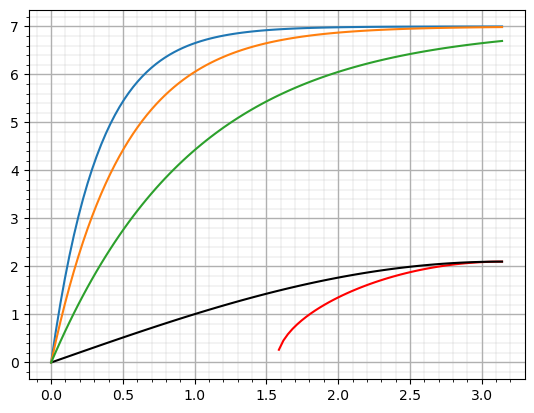

In [32]:
# Calc of speed function
# E_potential in highest point should be the same as E_kinetic
# Е_potential = m*g*h = self.pole_mass
# Е_kinetic = Е_transl + Е_rot
# E_transl = 1/2 * m * v_cm**2           v_cm = general speed of the center of mass
# E_rot = 1/2 * I_cm * omega**2          I_cm = moment of inertia of the center of mass. omega - rot speed of the pole
# I_cm = 1/12 * m * l**2
# E_kinetic = 2/3 * m * v**2             m = mass of pole
# E_potential in the top point = m * g * h = m * g * l/2
# 2/3 * m * v**2  = m * g * l/2
# v_cm = sqrt(3/4 * g * l) = 


def compute_ideal_tip_speed_arc(theta: float, g: float = 9.81, l: float = 0.6) -> float:
    """
    Compute ideal center of mass speed along the arc, assuming theta=0 at top, theta=pi at bottom.
    
    Args:
        theta (float): Pole angle in radians (0 at top, pi at bottom).
        g (float): Gravitational acceleration (m/s²).
        l (float): Pole length (m).

    Returns:
        float: Ideal center of mass speed (m/s) at the given angle.
    """
    # Maximum speed at the bottom
    v_cm_max = np.sqrt(3/4 * g * l)
    
    # Height of center of mass relative to bottom
    h = (l/2) * (1 + np.cos(theta))  # changed sign
    
    # Compute kinetic energy part
    expression = v_cm_max**2 - 1.5 * g * h 
    
    #if expression <= 0:
    #    return 0.0  # physically, speed cannot be negative

    return np.sqrt(expression)
                                    
x = np.linspace(0, np.pi, 100)
etalon_f = compute_ideal_tip_speed_arc(theta = x, g= 9.81, l = 0.6)
plt.plot(x,etalon_f, color = 'r')



####
# Substitute Ideal velocity function
def smooth_tip_speed(theta: float, g: float = 9.81, l: float = 0.6) -> float:
    """
    Smooth approximation of the center of mass speed along the arc without sqrt restrictions.
    
    Args:
        theta (float): Pole angle in radians (0 at top, pi at bottom).
        g (float): Gravitational acceleration (m/s²).
        l (float): Pole length (m).
    
    Returns:
        float: Smoothed center of mass speed (m/s) at given angle.
    """
    v_cm_max = np.sqrt(3/4 * g * l)
    return v_cm_max * np.abs(np.sin(theta / 2))

substitute_f = smooth_tip_speed(x)
plt.grid(which = "major", linewidth = 1)
plt.grid(which = "minor", linewidth = 0.2)
plt.minorticks_on()

plt.plot(x, substitute_f, color = 'black')
plt.plot(x,fv_experiment_1)
plt.plot(x,fv_curr)
plt.plot(x,fv_new_experiment_2)

In [34]:
smooth_tip_speed(0.2 / 0.6)

0.3485595791924177

In [41]:
def compute_ideal_tip_acceleration(dist: float, omega: float) -> float:
    """
    Compute ideal tip acceleration based on distance along arc and angular velocity.

    Args:
        dist (float): Arc length from the top (meters).
        omega (float): Pole angular velocity (rad/s).

    Returns:
        float: Ideal center of mass acceleration (m/s²).
    """
    theta = dist / 0.6  # convert arc distance back to angle in radians
    v_cm_max = np.sqrt(3/4 * 9.81 * 0.6)
    ideal_a_tip = 0.5 * v_cm_max * np.cos(theta / 2) * omega
    return ideal_a_tip

omega = np.linspace(0, 2.1, 100)
compute_ideal_tip_acceleration(0.2, omega).max()

2.1755549538630157

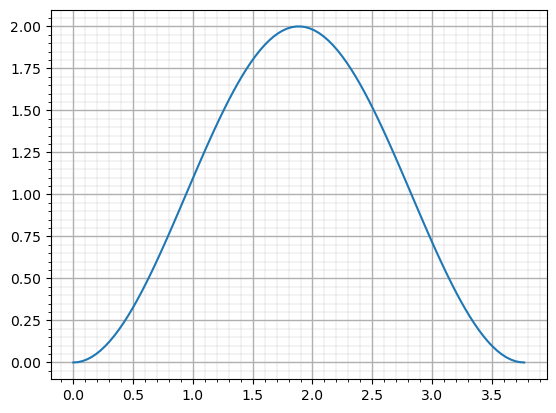

In [5]:
# Speed function depending on the angle and arc distance
l = 0.6

dist = np.linspace(0, 2*np.pi * l, 100)
theta = dist/l

speed = 1 - np.cos(theta)

plt.grid(which = "major", linewidth = 1)
plt.grid(which = "minor", linewidth = 0.2)
plt.minorticks_on()
plt.plot(dist,speed)

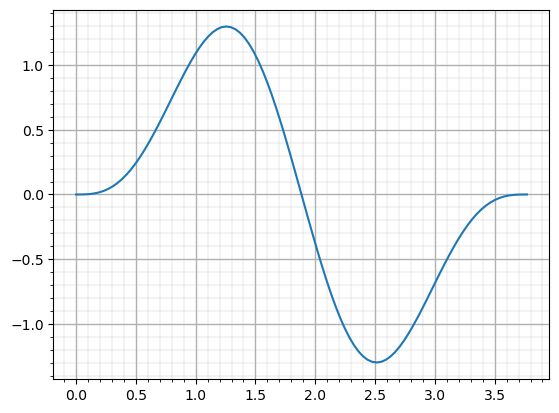

In [6]:
# Acceleration function depending on the angle and arc distance
l = 0.6
target_zone_radius = 0.1

dist = np.linspace(0, 2*np.pi * l, 100)
theta = dist/l

speed = 1 - np.cos(theta)
accel = np.sin(theta) * speed

plt.grid(which = "major", linewidth = 1)
plt.grid(which = "minor", linewidth = 0.2)
plt.minorticks_on()
plt.plot(dist,accel)

In [7]:
# Acceleration function depending on the angle and arc distance
l = 0.6
target_zone_radius = 0.1

dist = target_zone_radius
theta = dist/l

speed = 1 - np.cos(theta)
accel = np.sin(theta) * speed

print(speed)
print(accel)

0.013856768437074951
0.0022987842953389116
